## 导入包

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib
from sklearn import datasets
# import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体或其他支持中文的字体


## 加载糖尿病数据集


In [46]:
# 加载糖尿病数据集
diabetes = datasets.load_diabetes()

# 创建DataFrame来存储数据集
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names

# 创建包含响应变量'y'（基线后一年的疾病进展的定量测量）的新列
df['diabetes_measure'] = diabetes.target

# 打印数据集的前几行
print(df.head())

# 创建特征矩阵X
X = df.iloc[:, :-1]

# 创建响应向量y
y = df.iloc[:, -1]


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes_measure  
0 -0.002592  0.019908 -0.017646             151.0  
1 -0.039493 -0.068330 -0.092204              75.0  
2 -0.002592  0.002864 -0.025930             141.0  
3  0.034309  0.022692 -0.009362             206.0  
4 -0.002592 -0.031991 -0.046641             135.0  


## 选择'bmi'作为特征矩阵X的唯一特征，并将数组转换为2维


In [47]:
bmi = X.iloc[:, 2].to_numpy()
bmi = bmi[:, np.newaxis]

## 选择'diabetes_measure'作为响应变量，并将数组转换为2维

In [48]:

y = df.iloc[:, -1].to_numpy()
y = y[:, np.newaxis]


## 实例化线性回归模型并拟合

In [49]:
# 实例化线性回归模型
simple_lr = LinearRegression()

# 拟合简单线性回归模型
simple_lr.fit(bmi, y)

# 预测响应值并保存在predicted_y变量中
predicted_y = simple_lr.predict(bmi)


## 在散点图上绘制回归线

c:\Users\29492\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


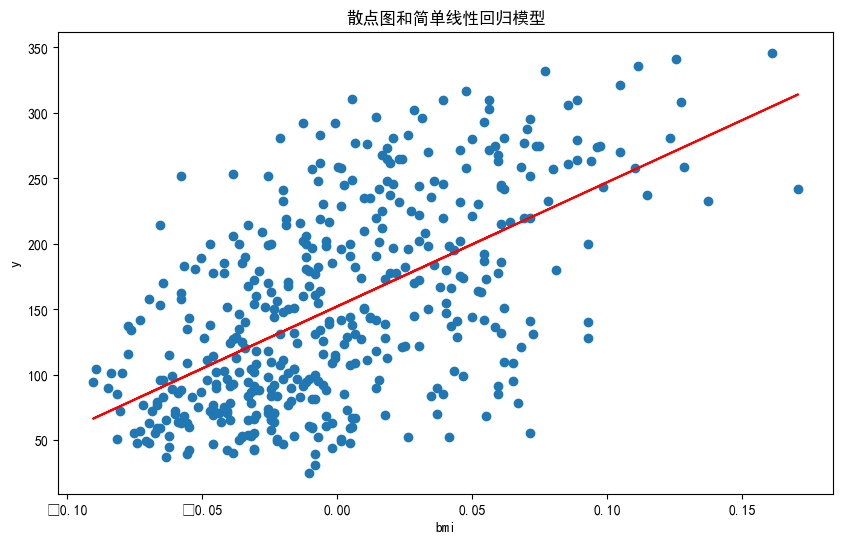

In [50]:


plt.figure(figsize=(10, 6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted_y, c='r')
plt.title('散点图和简单线性回归模型')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

## 选择'bp'作为特征矩阵X的唯一特征，并将数组转换为2维


c:\Users\29492\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


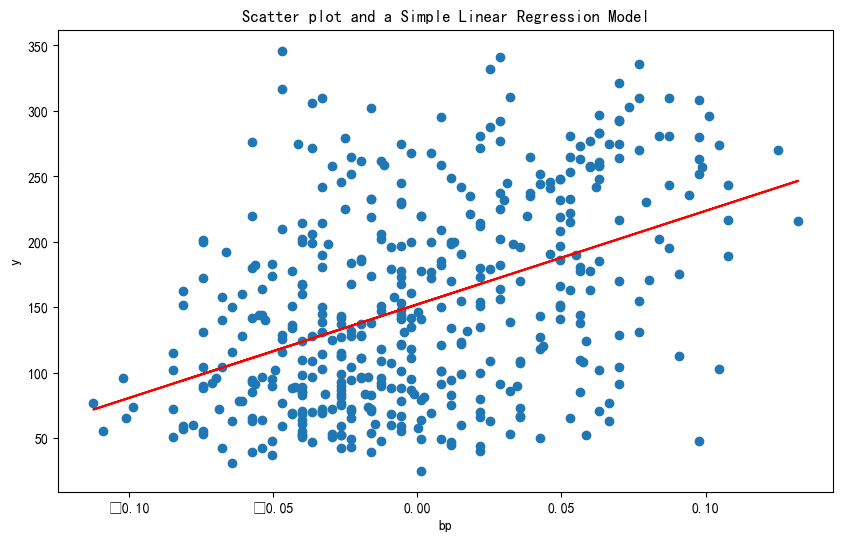

In [51]:


# Choosing 'bp' as the only feature from the feature matrix X and reshaping the array to 2 dimensions
bp = (X.iloc[:, 3]).to_numpy()
bp = bp[:, np.newaxis]
# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y = df.iloc[:, -1].to_numpy()
y = y[:, np.newaxis]

# importing the LinearRegression class from linear_model submodule of scikit learn
# instantiating
simple_lr = LinearRegression()
# Fitting the simple_lr object to the data
simple_lr = LinearRegression().fit(bp, y)
# predicting the response values and saving them in an object called predicted_y
predicted_y = simple_lr.predict(bp)

# plotting the regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bp, y)
plt.plot(bp, predicted_y, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("bp")
plt.show()

## 交叉验证函数cross_val_score

In [52]:
# 使用负均方误差（neg_mean_squared_error）作为评估指标进行10折交叉验证，并将得分保存在mse变量中
mse = cross_val_score(simple_lr, bmi, y, scoring='neg_mean_squared_error', cv=10)

# 取mse的平均值作为模型性能的指标
print(mse.mean())

-3906.91899010684


## 多元线性回归模型

In [53]:
# 实例化多元线性回归模型
multiple_lr = LinearRegression()

# 拟合多元线性回归模型
multiple_lr.fit(X, y)

LinearRegression()

## 交叉验证函数cross_val_score

In [54]:
# 使用交叉验证函数cross_val_score，使用负均方误差（neg_mean_squared_error）作为评估指标进行10折交叉验证，并将得分保存在mse变量中
mse = cross_val_score(multiple_lr, X, y, scoring='neg_mean_squared_error', cv=10)

# 取mse的平均值作为模型性能的指标
mse.mean()

-3000.381032839051

In [55]:
# 提取多元线性回归模型的系数
multiple_lr_coeffs = multiple_lr.coef_[0]
multiple_lr_coeffs

# 从DataFrame df中获取特征名称
feature_names = df.drop('diabetes_measure', axis=1).columns
feature_names


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## 绘制系数图
图形展示了多元线性回归模型的系数。x轴代表模型中使用的特征，y轴代表系数。红色的水平线代表系数为零。
 这个图可以帮助我们理解每个特征对于模型的预测结果的影响程度。如果一个特征的系数为正，那么它对于预测结果的影响是正向的;如果一个特征的系数为负，那么它对于预测结果的影响是负向的。如果一个特征的系数接近于零,那么它对于预测结果的影响可以忽略不计



c:\Users\29492\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


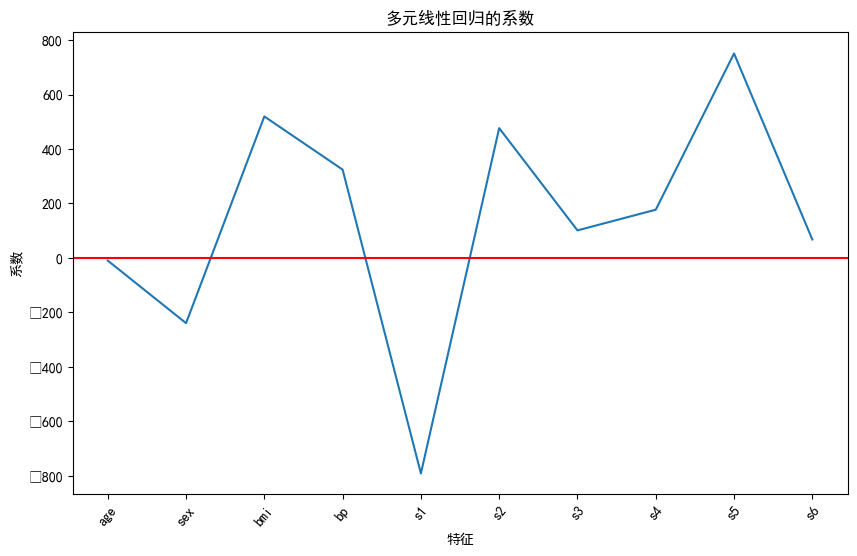

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(multiple_lr_coeffs)), multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)), feature_names, rotation=50)
plt.title("多元线性回归的系数")
plt.ylabel("系数")
plt.xlabel("特征")
plt.show()

## 实例化岭回归模型

In [57]:
# 实例化岭回归模型，并使用网格搜索（GridSearchCV）选择最佳的alpha值
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10)

# 输出最佳的alpha值
print('最佳的alpha值为:', ridge.fit(X, y).best_params_)

# 输出岭回归模型的平均负均方误差得分
print('最佳Ridge回归模型的得分为:', ridge.fit(X, y).best_score_)

# 创建包含最佳Ridge回归模型的对象
best_ridge_model = Ridge(alpha=0.04)

# 提取所有特征的系数估计值
best_ridge_coeffs = best_ridge_model.fit(X, y).coef_

最佳的alpha值为: {'alpha': 0.04}
最佳Ridge回归模型的得分为: -2997.186793719345


## 绘制岭回归模型的系数估计值

c:\Users\29492\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


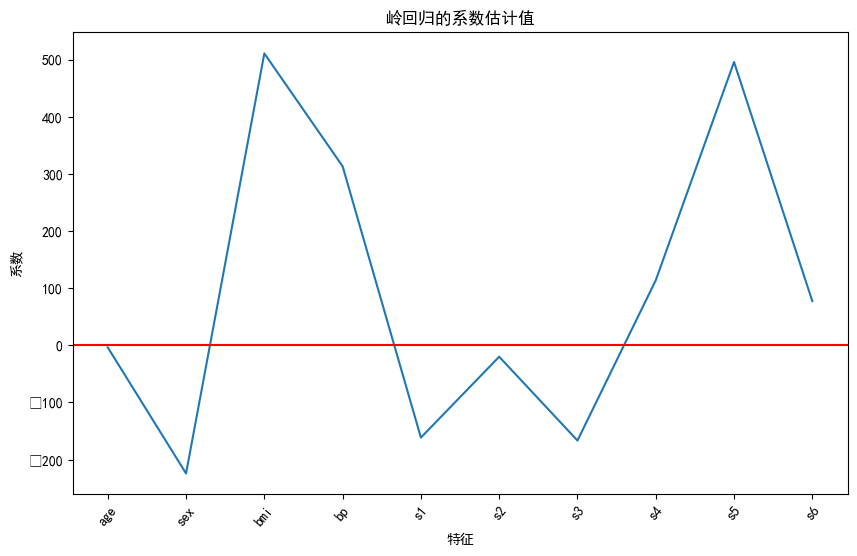

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)), feature_names, rotation=50)
plt.title("岭回归的系数估计值")
plt.ylabel("系数")
plt.xlabel("特征")
plt.show()

## 实例化Lasso回归模型

In [59]:

# 实例化Lasso回归模型，并使用网格搜索（GridSearchCV）选择最佳的alpha值
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10)

# 输出最佳的alpha值
print('最佳的alpha值为:', lasso.fit(X, y).best_params_)

# 输出Lasso回归模型的平均负均方误差得分
print('最佳Lasso回归模型的得分为:', lasso.fit(X, y).best_score_)

# 创建包含最佳Lasso回归模型的对象
best_lasso_model = Lasso(alpha=0.06)

# 提取所有特征的系数估计值
best_lasso_coeffs = best_lasso_model.fit(X, y).coef_

最佳的alpha值为: {'alpha': 0.06}
最佳Lasso回归模型的得分为: -2987.4180821246437


## 绘制Lasso回归模型的系数估计值

c:\Users\29492\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


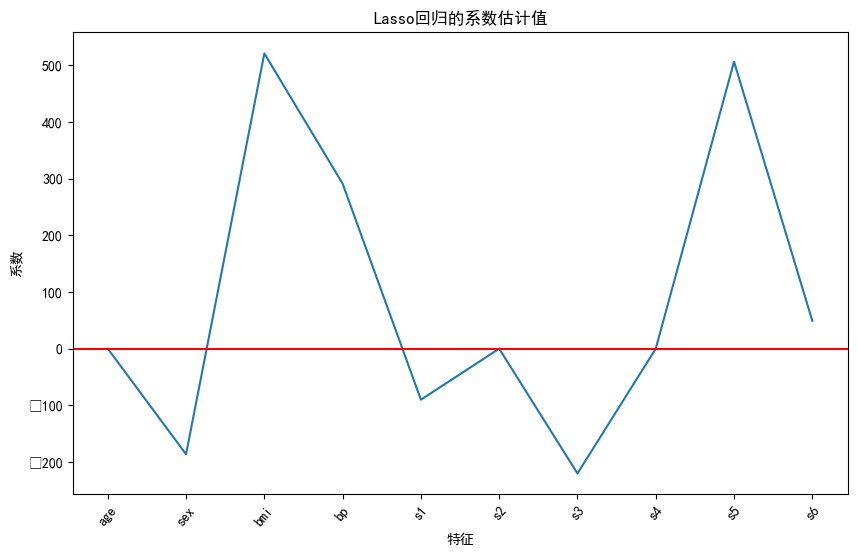

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)), feature_names, rotation=50)
plt.title("Lasso回归的系数估计值")
plt.ylabel("系数")
plt.xlabel("特征")
plt.show()

## 包含三个模型系数的DataFrame

In [61]:
best_lasso_coeffs

# 创建一个包含三个模型系数的DataFrame
comparing_models = pd.DataFrame({'无正则化': multiple_lr_coeffs,
                                 'Ridge': best_ridge_coeffs[0],
                                 'Lasso': best_lasso_coeffs},
                                index=feature_names)

## 绘制线性回归、岭回归和Lasso回归的系数


c:\Users\29492\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


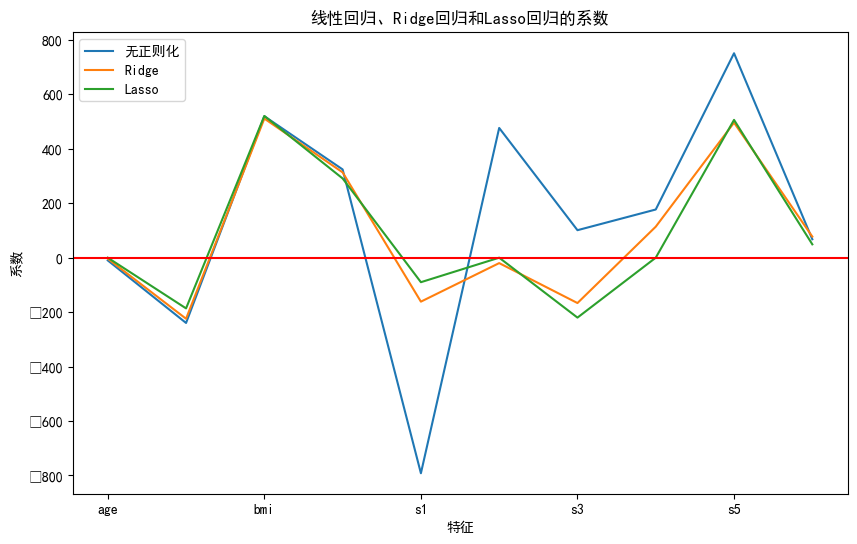

In [62]:
comparing_models.plot(figsize=(10, 6))
plt.axhline(0, color='r', linestyle='solid')
plt.title("线性回归、Ridge回归和Lasso回归的系数")
plt.ylabel("系数")
plt.xlabel("特征")
plt.show()
